<h1 <b style="color:DodgerBlue;"> Case Study: App Installments Predictions </b> </h1>

<h3 style="color:#1C658C;">  Problem Statement </h3>
<p  style="color: #1C658C">
Google play store is the hub to download all the apps on the device whether it is a laptop or 
mobile phone. When we download app from Google play store, on screen page some sort of 
information's like reviews, ratings, type of app in Google play store etc., characteristics are there.
By using different ML algorithms, we have to predict total number of downloads of a particular 
app from Google play store. We have to predict the total number of downloads based on 
different features.
</p>   

### Importing Libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', None)
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

### Reading data using pandas library 


In [3]:
data = pd.read_csv("googleplaystore.csv",sep=',')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


### Exploratory Data Analysis

In [10]:
print("The Number of Rows :", len(data))
print("The Number of Columns :", len(data.axes[1]))

The Number of Rows : 10841
The Number of Columns : 13


In [38]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


<p style="color: #1C658C"> The info output shows that : <br>
    1. There are 10841 records <br>
    2. We have 13 columns in the data. Out of 13 columns, 12 are of object datatype and 1 is of float datatype. <br>
</p>   

### Data Preprocessing

#### 1. Finding the null values in the dataset.

In [33]:
data.isnull().sum()   

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

<p style="color: #1C658C"> 
    Only Rating column is having 1474 null values.
</p>   

In [36]:
data.columns 

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [37]:
# Renaming the columns 
data.rename(columns={'Current Ver':'CurrentVer','Android Ver':'AndroidVer'},inplace=True)

### Imputation of null values

In [7]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5,weights='uniform')
data['Rating'] = imputer.fit_transform(data[['Rating']]).ravel()

In [8]:
data.dropna(axis = 0, how = 'any',inplace = True)

In [9]:
data.isnull().sum()   

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
CurrentVer        0
AndroidVer        0
dtype: int64

#### 2. Data Cleaning

In [10]:
## Converting data type of reviews column
data.Reviews= data.Reviews.astype(int)  

## Removing puntuation
data.Installs= data["Installs"].str.replace("+", "")
data.Installs= data["Installs"].str.replace(",", "")
## Converting data type of Installs columns
data["Installs"] = pd.to_numeric(data["Installs"])

## Removing puntuation
data["Price"]= data["Price"].str.replace("$", "")
## Converting dtype
data["Price"]= data.Price.astype(float)

## Removing puntuation
data.Size= data["Size"].str.replace("M", "")
data.Size= data['Size'].str.replace("Varies with device","-1")
## Round off
data['Size']=data['Size'].apply(lambda x: str(round((float(x.rstrip('k'))/1024),1) )if x[-1]=='k' else x)
## Converting dtype
data["Size"]= data.Size.astype(float)

## Removing puntuation
data["AndroidVer"]= data["AndroidVer"].str.replace("and up", "")
data["AndroidVer"]= data["AndroidVer"].map({"Varies with device ":"0"})
## Converting dtype
data["AndroidVer"]= data.AndroidVer.astype(float)

data["CurrentVer"]= data["CurrentVer"].map({"Varies with device ":"0"})
## Converting dtype
data["CurrentVer"]= data.CurrentVer.astype(float)

data['Type'] = data['Type'].map({"Free": 1, "Paid": 0})

## Converting dtype
data['Last Updated'] =  pd.to_datetime(data['Last Updated'])



data.columns = data.columns.str.replace(' ', '')
data= data.rename(columns=str.lower)


C:\Users\gaurm\AppData\Local\Temp\ipykernel_11048\4141765028.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.Installs= data["Installs"].str.replace("+", "")
C:\Users\gaurm\AppData\Local\Temp\ipykernel_11048\4141765028.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["Price"]= data["Price"].str.replace("$", "")


In [11]:
data.dtypes

app                      object
category                 object
rating                  float64
reviews                   int32
size                    float64
installs                  int64
type                      int64
price                   float64
contentrating            object
genres                   object
lastupdated      datetime64[ns]
currentver              float64
androidver              float64
dtype: object

In [12]:
data

,app,category,rating,reviews,size,installs,type,price,contentrating,genres,lastupdated,currentver,androidver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19.0,10000,1,0.0,Everyone,Art & Design,2018-01-07,NaN,NaN
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14.0,500000,1,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,NaN,NaN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.7,5000000,1,0.0,Everyone,Art & Design,2018-08-01,NaN,NaN
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25.0,50000000,1,0.0,Teen,Art & Design,2018-06-08,NaN,NaN
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8,100000,1,0.0,Everyone,Art & Design;Creativity,2018-06-20,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.500000,38,53.0,5000,1,0.0,Everyone,Education,2017-07-25,NaN,NaN
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.6,100,1,0.0,Everyone,Education,2018-07-06,NaN,NaN
10838,Parkinson Exercices FR,MEDICAL,4.193338,3,9.5,1000,1,0.0,Everyone,Medical,2017-01-20,NaN,NaN
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,-1.0,1000,1,0.0,Mature 17+,Books & Reference,2015-01-19,NaN,NaN


### CONVERTING CATEGORICAL FEATURES INTO NUMERICAL ONE'S USING COUNT FREQUENCY ENCODER


In [13]:
from feature_engine.encoding import CountFrequencyEncoder
CFE = CountFrequencyEncoder(encoding_method='count')
data1 = CFE.fit_transform(data)
data1.drop(columns = ['lastupdated','currentver','androidver'],inplace = True)
data1

,app,category,rating,reviews,size,installs,type,price,contentrating,genres
0,1,64,4.100000,159,19.0,10000,1,0.0,8704,57
1,2,64,3.900000,967,14.0,500000,1,0.0,8704,2
2,1,64,4.700000,87510,8.7,5000000,1,0.0,8704,57
3,1,64,4.500000,215644,25.0,50000000,1,0.0,1208,57
4,1,64,4.300000,967,2.8,100000,1,0.0,8704,7
...,...,...,...,...,...,...,...,...,...,...
10836,1,1968,4.500000,38,53.0,5000,1,0.0,8704,548
10837,1,1968,5.000000,4,3.6,100,1,0.0,8704,548
10838,1,463,4.193338,3,9.5,1000,1,0.0,8704,463
10839,1,230,4.500000,114,-1.0,1000,1,0.0,499,230


In [14]:
data1.dtypes

app                int64
category           int64
rating           float64
reviews            int32
size             float64
installs           int64
type               int64
price            float64
contentrating      int64
genres             int64
dtype: object

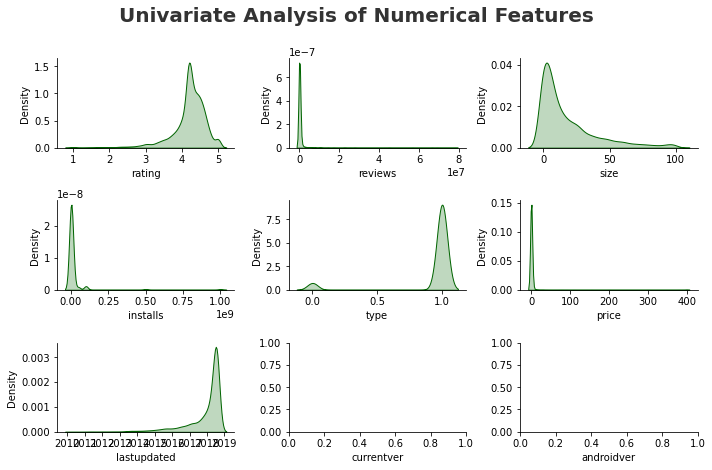

In [15]:
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
plt.figure(figsize = (10,10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize = 20, fontweight = 'bold', alpha = 0.8, y = 1)

for i in range(0, len(numeric_features)):
    plt.subplot(5,3, i+1)
    sns.kdeplot(x = data[numeric_features[i]], shade = True, color = 'darkgreen')
    sns.despine()
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

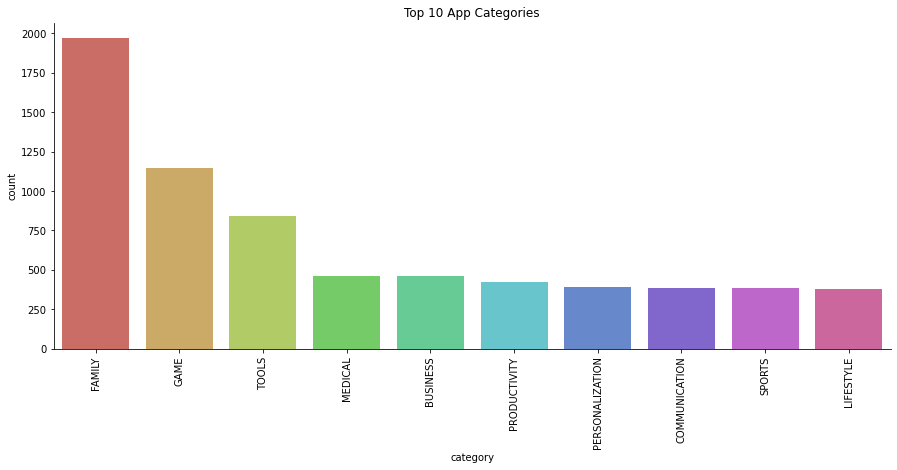

In [16]:
# Top 10 App Categories

top_categories = data['category'].value_counts().head(10)
plt.figure(figsize = (15,6))
sns.countplot(x = data['category'], order = top_categories.index, palette = 'hls', )
plt.title("Top 10 App Categories")
plt.xticks(rotation = 90)
sns.despine()
plt.show()

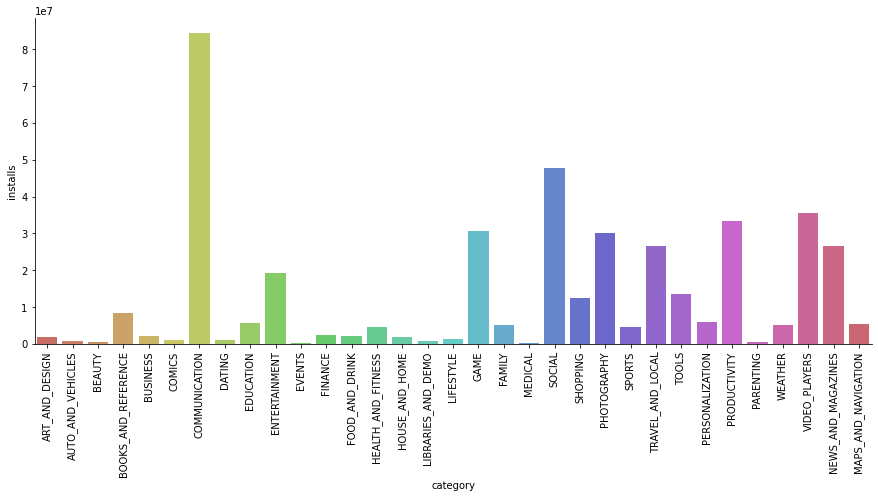

In [17]:
plt.figure(figsize= (15,6))
sns.barplot(data = data, x = 'category' ,y = 'installs', palette='hls', ci = None)
plt.xticks(rotation = 90)
sns.despine()
plt.show()

In [18]:
#calculating VIf to check the MUlti-collinearity between variables -
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()                         
vif_data["feature"] = data1.columns
vif_data["VIF"] = [variance_inflation_factor(data1.values, i)
                          for i in range(len(data1.columns))]
print(vif_data)

         feature        VIF
0            app   3.930713
1       category   2.533086
2         rating  21.212958
3        reviews   1.794111
4           size   1.950599
5       installs   1.846211
6           type  12.210866
7          price   1.048433
8  contentrating   6.278864
9         genres   3.973341


In [19]:
#DROPPING COLUMN WHICH HAD HIGH VIF
data1.drop(columns=['rating','type'],inplace = True)

In [20]:
#TREATMENT FOR MULTICOLLINEARITY
data1.columns

Index(['app', 'category', 'reviews', 'size', 'installs', 'price',
       'contentrating', 'genres'],
      dtype='object')

In [21]:
vif_data = pd.DataFrame()                         
vif_data["feature"] = data1.columns
vif_data["VIF"] = [variance_inflation_factor(data1.values, i)
                          for i in range(len(data1.columns))]
print(vif_data)

         feature       VIF
0            app  2.943437
1       category  2.388960
2        reviews  1.792728
3           size  1.803422
4       installs  1.841689
5          price  1.004931
6  contentrating  3.839736
7         genres  3.393989


In [22]:
x = data1.drop(labels=['installs'],axis = 1)
y = data1['installs']

In [23]:
x

,app,category,reviews,size,price,contentrating,genres
0,1,64,159,19.0,0.0,8704,57
1,2,64,967,14.0,0.0,8704,2
2,1,64,87510,8.7,0.0,8704,57
3,1,64,215644,25.0,0.0,1208,57
4,1,64,967,2.8,0.0,8704,7
...,...,...,...,...,...,...,...
10836,1,1968,38,53.0,0.0,8704,548
10837,1,1968,4,3.6,0.0,8704,548
10838,1,463,3,9.5,0.0,8704,463
10839,1,230,114,-1.0,0.0,499,230


### Train Test Split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.33)

### Model Building

#### 1. LINEAR REGRESSION


In [27]:
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [28]:
Reg_predicted = LR.predict(x_test)

In [29]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE_LR = mean_absolute_percentage_error(Reg_predicted,y_test)
MAPE_LR

1.5763569421028873

#### 2. DECISION TREE

In [30]:
DT = DecisionTreeRegressor()
DT.fit(x_train,y_train)

DecisionTreeRegressor()

In [31]:
DT_predicted = DT.predict(x_test)

In [32]:
MAPE_DT = mean_absolute_percentage_error(DT_predicted,y_test)
MAPE_DT

88207043625054.42

#### 3. RANDOM FOREST

In [33]:
RF = RandomForestRegressor()
RF.fit(x_train,y_train)
RF_predicted = RF.predict(x_test)
MAPE_RF = mean_absolute_percentage_error(RF_predicted,y_test)
MAPE_RF

0.821444529834486

In [34]:
#Hyperparameter Tuning the Random Forest to improve accuracy in Python
from sklearn.model_selection import GridSearchCV
param_grid = {

    'max_depth': [7,8],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [3],
    'n_estimators': [300,400]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 0)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)

{'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 400}


In [35]:
RF = RandomForestRegressor(max_depth=8,min_samples_leaf=3,min_samples_split=3,n_estimators=400)
RF.fit(x_train,y_train)
RF_predicted = RF.predict(x_test)
MAPE_RF = mean_absolute_percentage_error(RF_predicted,y_test)
MAPE_RF

0.7984561805990592

#### 4. XGBOOSTING

In [36]:
xgb = XGBRegressor()
xgb.fit(x_train, y_train)
xgb_predicted = xgb.predict(x_test)
MAPE_xgb = mean_absolute_percentage_error(xgb_predicted,y_test)
MAPE_xgb

C:\Users\gaurm\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


1.4347450957721843

In [37]:
XGBRegressor()

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)

In [38]:
param_grid = {
    'max_depth': [7,8],
    'learning_rate': [0.01, 0.05, 0.1 ],
    'gamma': [0.25, 0.5, 1],
    'reg_lambda': [5, 6, 7],
    'scale_pos_weight': [3]}
# Create a based model
XG = XGBRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = XG, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 0)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)

C:\Users\gaurm\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


{'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 8, 'reg_lambda': 5, 'scale_pos_weight': 3}


In [39]:
xgb = XGBRegressor(gamma=0.25,learning_rate=0.1,max_depth=8,reg_lambda=5,scale_pos_weight=3)
xgb.fit(x_train, y_train,early_stopping_rounds=10, 
             eval_set=[(x_test, y_test)],
             verbose=False)
xgb_predicted = xgb.predict(x_test)
MAPE_xgb = mean_absolute_percentage_error(xgb_predicted,y_test)
MAPE_xgb

1.0475255684940286

#### 5. KNN

In [40]:
KNN = KNeighborsRegressor(n_neighbors=5)
KNN.fit(x_train,y_train)
KNN_predicted = KNN.predict(x_test)
MAPE_KNN = mean_absolute_percentage_error(KNN_predicted,y_test)
MAPE_KNN

1.3922639985717642

In [41]:
print(MAPE_LR,MAPE_KNN,MAPE_RF,MAPE_xgb,MAPE_DT)

1.5763569421028873 1.3922639985717642 0.7984561805990592 1.0475255684940286 88207043625054.42


### Prediction for 20 sample from the data

In [56]:
Prediction = data1.sample(n = 20)
Prediction

,app,category,reviews,size,installs,price,contentrating,genres
538,1,234,7888,15.0,500000,0.00,499,234
7577,1,841,24226,-1.0,1000000,0.00,8704,840
5582,1,1144,125652,56.0,10000000,0.00,8704,365
6805,1,841,20,7.9,1000,0.00,8704,840
5703,1,175,43,44.0,1000,0.00,8704,173
4462,1,390,1,1.8,10,0.99,8704,390
932,3,149,296829,11.0,10000000,0.00,1208,622
5116,1,1968,3,62.0,500,0.00,8704,622
8085,1,1144,16851,81.0,100000,1.99,413,22
949,2,149,35279,15.0,1000000,0.00,1208,622


In [57]:
X_train,X_test,Y_train,Y_test = train_test_split(Prediction[["app",'category','reviews','size','contentrating','price','genres']]\
                                                            ,Prediction['installs'],test_size = 0.33)

In [58]:
RFR = RandomForestRegressor()

In [59]:
RFR.fit(X_train,Y_train)

RandomForestRegressor()

In [60]:
SAMPLE20 = RFR.predict(X_test)

In [61]:
MAPE_RFR=mean_absolute_percentage_error(SAMPLE20,Y_test)
MAPE_RFR

0.5440285762485193

<h3 style="color:#1C658C;">  BUSINESS SCOPE OF THIS PROJECT </h3>
<p  style="color: #1C658C">
There are several business scope for this project some of them are: <br>
1.Gain edge over the industry competetion for app success. <br>
2.Provide insight for advertisement companies on which app would generate the most revenue if ads were added. <br>
3.Assist android developer to develop state-of-the-art app for the public. <br>
</p>   